In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import get_fin_data as gfd
from pairs_methods import distance_approach as dist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import backtest 
import data_base as db
import os

In [5]:
petr = gfd.get_close_price("PETR4.SA", "2021-01-01")
print(petr.head())

[*********************100%***********************]  1 of 1 completed
Date
2021-01-04    13.732214
2021-01-05    14.268963
2021-01-06    14.297462
2021-01-07    14.724961
2021-01-08    14.781961
Name: Adj Close, dtype: float64


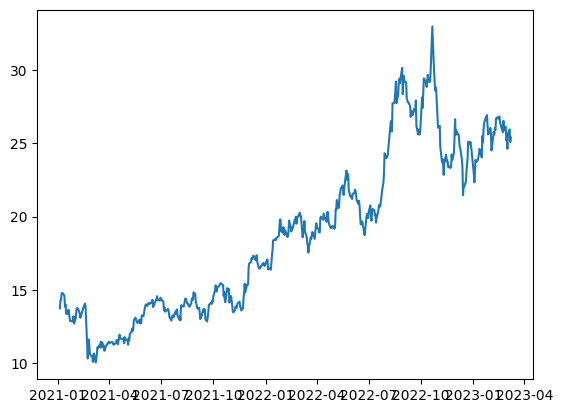

In [6]:
fig, ax = plt.subplots()
ax.plot(petr.index, petr)
plt.show()

In [7]:
# create random series to simulate and test functions

x = np.random.randn(375)/100
x = np.cumprod(1 + x)
x *= 5
x = pd.Series(x)

y = np.random.randn(375)/100
y = np.cumprod(1 + y) 
y *= 6
y = pd.Series(y)

print(x.head())
print(y.head())

0    4.972517
1    4.926942
2    4.918233
3    4.950248
4    4.871845
dtype: float64
0    6.063369
1    6.063644
2    6.110471
3    6.029200
4    5.990273
dtype: float64


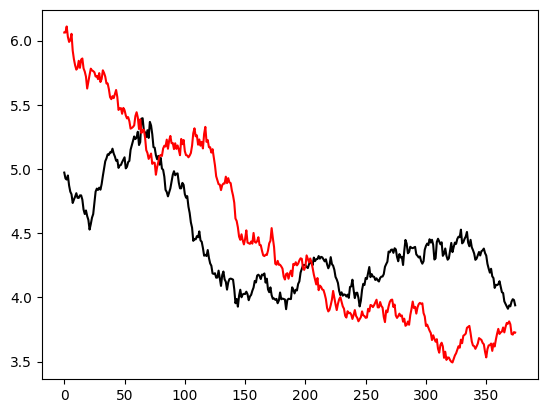

In [8]:
### plot series
fig, ax = plt.subplots()
ax.plot(x.index, x, color="black")
ax.plot(y.index, y, color="red")
plt.show()

In [9]:
x_train, x_test = backtest.split_train_test(x, 0.7)
y_train, y_test = backtest.split_train_test(y, 0.7)

print(x_train, x_test)

0      4.972517
1      4.926942
2      4.918233
3      4.950248
4      4.871845
         ...   
258    4.136275
259    4.148718
260    4.133008
261    4.124196
262    4.151669
Length: 263, dtype: float64 262    4.151669
263    4.162320
264    4.163001
265    4.181737
266    4.238509
         ...   
370    3.930995
371    3.967819
372    3.986260
373    3.979760
374    3.938786
Length: 113, dtype: float64


In [10]:
x_train_norm, x_test_norm = dist.normalize_series(x_train, x_test)
y_train_norm, y_test_norm = dist.normalize_series(y_train, y_test)

print(y_train_norm, y_test_norm)


0      0.979486
1      0.979606
2      1.000000
3      0.964605
4      0.947651
         ...   
258    0.063994
259    0.073136
260    0.047251
261    0.047047
262    0.065213
Length: 263, dtype: float64 262    0.065213
263    0.051955
264    0.046632
265    0.014752
266   -0.002707
         ...   
370   -0.010306
371   -0.043127
372   -0.045216
373   -0.036816
374   -0.038136
Length: 113, dtype: float64


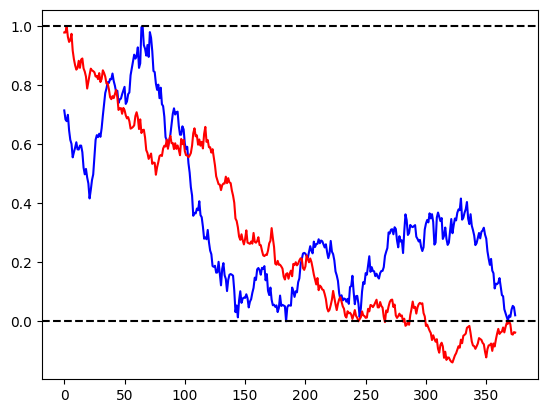

In [11]:
x_train_test_norm = pd.concat([x_train_norm, x_test_norm], axis=0)
y_train_test_norm = pd.concat([y_train_norm, y_test_norm], axis=0)

fig, ax = plt.subplots()
ax.plot(x_train_test_norm, color="blue")
ax.plot(y_train_test_norm, color="red")
ax.axhline(0, color="black", linestyle="dashed")
ax.axhline(1, color="black", linestyle="dashed")
plt.show()

In [12]:
spread_train = dist.spread_distance(x_train_norm, y_train_norm)
spread_test = dist.spread_distance(x_test_norm, y_test_norm)

z_score_train, z_score_test = dist.z_score(spread_train, spread_test)
z_score_train_test = pd.concat([z_score_train, z_score_test], axis=0)

print(z_score_train_test)



0     -1.776734
1     -2.030643
2     -2.247314
3     -1.777485
4     -2.072634
         ...   
370    0.613495
371    1.088767
372    1.208346
373    1.102940
374    0.886451
Length: 376, dtype: float64


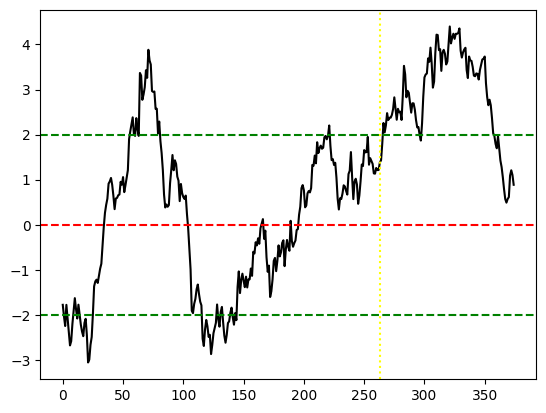

In [13]:

fig, ax = plt.subplots()
ax.plot(z_score_train_test, color="black")
ax.axhline(0, color="red", linestyle="dashed")
ax.axhline(2, color="green", linestyle="dashed")
ax.axhline(-2, color="green", linestyle="dashed")
ax.axvline(len(z_score_train_test)*0.7, color="yellow", linestyle="dotted")
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
          Date    spread
0   2021-01-04 -1.951219
1   2021-01-05 -1.583988
2   2021-01-06 -1.962277
3   2021-01-07 -2.587563
4   2021-01-08 -2.513927
..         ...       ...
539 2023-03-02  4.447063
540 2023-03-03  4.827141
541 2023-03-06  4.557143
542 2023-03-07  4.279082
543 2023-03-08  4.033089

[544 rows x 2 columns]
